<a href="https://colab.research.google.com/github/rajitakolla/computational_methods/blob/master/Assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INFO5731 Assignment Four**

n this assignment, you are required to conduct topic modeling, sentiment analysis, and regression analysis.


#**Question 1: Topic Modeling**



(30 points).This question is designed to help you understand topic modeling better as well as how to visualize topic modeling results, aims to collect the human meanings of documents. Based on the yelp review data (only the review text will be used for this question), which can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0, select two models and write a python program to identify the top 20 topics (with 15 words for each topic) in the dataset. Before answering this question, please review the materials in lesson 8, as well as the introduction of these models by the links provided.

(1) Labeled LDA (LLDA): https://github.com/JoeZJH/Labeled-LDA-Python

(2) Biterm Topic Model (BTM): https://github.com/markoarnauto/biterm

(3) HMM-LDA: https://github.com/dongwookim-ml/python-topic-model

(4) SupervisedLDA: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(5) Relational Topic Model: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(6) LDA2VEC: https://github.com/cemoody/lda2vec

(7) BERTopic: https://github.com/MaartenGr/BERTopic

(8) LDA+BERT Topic Modeling: https://www.kaggle.com/dskswu/topic-modeling-bert-lda

(9) Clustering for Topic models: (paper: https://arxiv.org/abs/2004.14914), (code: https://github.com/adalmia96/Cluster-Analysis)

The following information should be reported:

(1) Top 20 clusters for topic modeling.

(2) Summarize and describe the topic for each cluster.

(3) Visualize the topic modeling reasults by using pyLDAVis: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#14.-pyLDAVis




In [ ]:
import pickle
import logging
 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt



In [ ]:
import os
os.getcwd()

from zipfile import ZipFile
dir = '/content/assignmentYelp.zip'

with ZipFile(dir, 'r') as item:  
    print('Extracting all the files now...') 
    item.extractall() 
    print('Done!')

FileNotFoundError: ignored

In [ ]:
# read the list of files in folders
import glob
import json
fn = glob.glob("/content/assignmentYelp/*.json")
tf = list()
st = list()
dateValue = list()
def set_sentiment(x):
  if(x == 5):
    return "Very positive"
  elif(x==1):
    return "Very Negative"
  elif(x==3):
    return "Neutral"
  elif(x==2):
    return "Negative"
  elif(x==4):
    return "Positive"
  
t = list()
for file in fn:
  with open(file,encoding = "utf-8") as i:
    jd = json.load(i)
    for data in jd:
      dateValue.append(data['date'])
      tf.append(data['text'])
      t.append(set_sentiment(data['stars']))
      st.append(data['stars'])
      



In [ ]:
import pandas as pd

rd = pd.DataFrame(tf,columns = ["Review"])
rd["sentiments"] = t
rd["Rating"] = st
rd["Date"] = dateValue


In [ ]:
#display the dataframe
rd.head(5)

,Review,sentiments,Rating,Date


In [ ]:
rd["cleaned_data"] = rd["Review"].apply(lambda p : p.lower())
import string
rd["cleaned_data"] = rd["cleaned_data"].apply(lambda p : ''.join([g for g in p if g not in string.punctuation]))

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
words = set(stopwords.words('english'))
rd["cleaned_data"] = rd["cleaned_data"].apply(lambda x: ' '.join([i for i in x.split() if i not in words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

fqWord = list(pd.Series(' '.join(rd['cleaned_data']).split()).value_counts()[:15].index)
#top 15 rare words
rare = list(pd.Series(' '.join(rd['cleaned_data']).split()).value_counts()[-15:].index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
rd["cleaned_data"] = rd["cleaned_data"].apply(lambda y: ' '.join([x for x in y.split() if x not in fqWord]))

In [ ]:
rd["cleaned_data"] = rd["cleaned_data"].apply(lambda x: ' '.join([y for y in x.split() if y not in rare]))

In [ ]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
import textblob
ps = PorterStemmer() 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
rd["cleaned_data"] = rd["cleaned_data"].apply(lambda x: ' '.join(word_tokenize(str(x))))

In [ ]:
rd.head(10)

,Review,sentiments,Rating,Date,cleaned_data


In [ ]:
from gensim import corpora, models
revData = rd["cleaned_data"].head(10000).values
rev = [p.split() for p in revData]

dLLDA = corpora.Dictionary(rev)
dLLDA.filter_extremes(no_below=3)
corpus = [dLLDA.doc2bow(tokens) for tokens in rev]

num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dLLDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dLLDA.keys()))
for a,cont in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

ValueError: ignored

0: 0.034*"dog" + 0.019*"dogs" + 0.018*"kids" + 0.017*"dr" + 0.017*"love" + 0.016*"park" + 0.011*"play" + 0.011*"staff" + 0.009*"family" + 0.009*"fun"

1: 0.010*"table" + 0.010*"minutes" + 0.010*"came" + 0.009*"didnt" + 0.008*"asked" + 0.007*"even" + 0.007*"got" + 0.007*"said" + 0.006*"order" + 0.006*"could"

2: 0.016*"beer" + 0.011*"menu" + 0.011*"bar" + 0.007*"night" + 0.007*"wine" + 0.007*"atmosphere" + 0.007*"little" + 0.007*"selection" + 0.007*"drinks" + 0.006*"happy"

3: 0.024*"love" + 0.020*"always" + 0.019*"friendly" + 0.014*"delicious" + 0.013*"staff" + 0.012*"fresh" + 0.011*"definitely" + 0.011*"nice" + 0.011*"best" + 0.010*"amazing"

4: 0.040*"coffee" + 0.029*"breakfast" + 0.016*"nails" + 0.014*"eggs" + 0.014*"nail" + 0.013*"brunch" + 0.012*"amazing" + 0.010*"nice" + 0.010*"super" + 0.009*"friendly"

5: 0.039*"hair" + 0.015*"cut" + 0.012*"always" + 0.011*"love" + 0.009*"color" + 0.008*"salon" + 0.008*"class" + 0.008*"awesome" + 0.007*"workout" + 0.007*"want"

6: 0.020*"chicke

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 4.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=abcffe2f54347799fde530b2dc85ff970dbb5f1bf3be5ef1348af4016a673835
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
a = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dLLDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(a)

NameError: ignored

In [ ]:
!pip install biterm

     |████████████████████████████████| 81kB 3.7MB/s 
  Created wheel for biterm: filename=biterm-0.1.5-cp36-cp36m-linux_x86_64.whl size=195428 sha256=6cb16ae32f138853932e2c384d410c4eb1174d2195bb568bb70e404f827568de
  Stored in directory: /root/.cache/pip/wheels/86/04/10/231fb1d39d86ab58c2683fd3d4fe8415a5bc284ba8a20fd638
Successfully built biterm


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
revBData = rd["cleaned_data"].head(1000).values
vector = CountVectorizer(stop_words='english')
X = vector.fit_transform(revBData).toarray()

ValueError: ignored

In [ ]:
from biterm.utility import vec_to_biterms

vocabulary = np.array(vector.get_feature_names())
biterms = vec_to_biterms(X)

NotFittedError: ignored

In [ ]:
from biterm.btm import oBTM

b_t_m = oBTM(num_topics=20, V=vocabulary)
btmModel = b_t_m.fit_transform(biterms, iterations=10)

NameError: ignored

In [ ]:
import numpy as np
from biterm.cbtm import oBTM 
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
from biterm.utility import vec_to_biterms, topic_summuary # helper functions


def vislz():

    vector = CountVectorizer(stop_words='english')
    X = vector.fit_transform(revBData[:100]).toarray()
    vocabulary = np.array(vector.get_feature_names())

    biterms = vec_to_biterms(X)
    b_t_m = oBTM(num_topics=20, V=vocabulary)
    print("\n\n Train Online BTM ..")
    for p in range(0, len(biterms), 100):
        bchunk = biterms[p:p + 100]
        b_t_m.fit(bchunk, iterations=10)
    topics = b_t_m.transform(biterms)

    print("\n\n Visualize Topics ..")
    Visualize = pyLDAvis.prepare(btm.phi_wz.T, topics, np.count_nonzero(X, axis=1), vocabulary, np.sum(X, axis=0))
    pyLDAvis.enable_notebook()
    pyLDAvis.display(Visualize)
    print("\n\n Topic coherence ..")
    topic_summuary(b_t_m.phi_wz.T, X, vocabulary, 10)
    print("\n\n Texts & Topics ..")
    for i in range(len(reviews[:100])):
        print("{} (topic: {})".format(reviews[i], topics[i].argmax()))
    return Visualize
vis1 = vislz()

ValueError: ignored

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

#**Question 2: Yelp Review Sentiment Analysis**


(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: 80% data for training and 20% data for testing.



The data can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0

The data was saved in json format, here is an example of the data (for this task, you only need to use the star rating and the review text fields):

{ // string, 22 character unique review id "review_id": "zdSx_SD6obEhz9VrW9uAWA",

// string, 22 character unique user id, maps to the user in user.json
"user_id": "Ha3iJu77CxlrFm-vQRs_8g",

// string, 22 character business id, maps to business in business.json
"business_id": "tnhfDv5Il8EaGSXZGiuQGg",

// integer, star rating
"stars": 4,

// string, date formatted YYYY-MM-DD
"date": "2016-03-09",

// string, the review itself
"text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

// integer, number of useful votes received
"useful": 0,

// integer, number of funny votes received
"funny": 0,

// integer, number of cool votes received
"cool": 0
}

The sentiment of can be accessed based on the star rating, if no star information avaliable for a record, just remove that record. Detail star and sentiment level can be matched blew:

Very positive = 5 stars

Positive = 4 stars

Neutral = 3 stars

Negative = 2 stars

Very negative = 1 star

Here is code for yelp data preprocessing: https://github.com/Yelp/dataset-examples.

Answer the following questions:

(1) Features used for sentiment classification and explain why you select these features (tf-idf, sentiment lexicon, word2vec, etc). Considering achieve the best performance as you can.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
rd.head(5)

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
def search(p,a):
  print("\033[1m"+"Accuracy Score = ",round(accuracy_score(p,a),2)*100,"%"+"\033[0m")
  print("\033[1m"+"The Classification report"+"\033[0m")
  print(classification_report(a,p))
  # sys.modules[__name__].__dict__.clear()
  pass

In [ ]:
import seaborn as sns
def vizer(ip):
  sns.heatmap(pd.DataFrame(ip).iloc[:-1, :].T, annot=True)
  pass

In [ ]:

def accuracyAnalysis(n_splits):
  seed = 7
  kfold = KFold(n_splits, random_state=seed,shuffle=True)
  scoring = 'accuracy'
  return kfold
  pass

In [ ]:
from sklearn.model_selection import cross_val_score
def cvsc(modelObject, x_test,y_test):
  kfold = accuracyAnalysis(10)
  print("\033[1m"+"Cross Validation Score",round(cross_val_score(modelObject,x_test,y_test,cv=kfold).mean()*100,2),"%","\033[0m")
  pass

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
#display the vocabulary
vzer = TfidfVectorizer(analyzer='word')
tfidf = vzer.fit_transform(rd["cleaned_data"].head(1000).values)
listof_column_names = vzer.get_feature_names()
tfidf_df = pd.DataFrame(tf_idf.toarray())
tfidf_df.columns = listof_column_names

from sklearn.model_selection import train_test_split,cross_val_score,KFold
x_train, x_test, y_train, y_test = train_test_split(tf_idf_df, required_df['sentiments'].head(1000).values,test_size=0.2)

In [ ]:
train_idf_data = vzer.transform(rd["cleaned_data"])

In [ ]:

from sklearn.svm import LinearSVC
lSVC = LinearSVC()

In [ ]:
lsvcmodel = lSVC.fit(x_train,y_train)

In [ ]:
y_opLSVC = lsvcmodel.predict(x_test)

In [ ]:
y_opLSVC

array(['Very positive', 'Very positive', 'Very positive', 'Very positive',
       'Positive', 'Positive', 'Positive', 'Very positive',
       'Very positive', 'Very positive', 'Very positive', 'Very positive',
       'Very Negative', 'Very positive', 'Very positive', 'Very positive',
       'Very positive', 'Very positive', 'Very positive', 'Very positive',
       'Very positive', 'Positive', 'Positive', 'Positive',
       'Very positive', 'Positive', 'Very positive', 'Very Negative',
       'Very Negative', 'Very Negative', 'Very positive', 'Very positive',
       'Very positive', 'Very positive', 'Neutral', 'Very positive',
       'Very positive', 'Very positive', 'Very positive', 'Very Negative',
       'Very Negative', 'Very positive', 'Very positive', 'Very positive',
       'Very positive', 'Very positive', 'Very positive', 'Very positive',
       'Very positive', 'Very positive', 'Very positive', 'Very Negative',
       'Very positive', 'Positive', 'Positive', 'Very positive',
 

In [ ]:
search(y_opLSVC,y_test)

Accuracy Score =  52.0 %
The Classification report
               precision    recall  f1-score   support

     Negative       0.00      0.00      0.00        22
      Neutral       0.25      0.05      0.08        20
     Positive       0.48      0.32      0.38        47
Very Negative       0.45      0.54      0.49        28
Very positive       0.55      0.87      0.67        83

     accuracy                           0.52       200
    macro avg       0.35      0.35      0.33       200
 weighted avg       0.43      0.52      0.45       200



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cvsc(lsvcmodel,x_test,y_test)

Cross Validation Score 44.5 % 


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


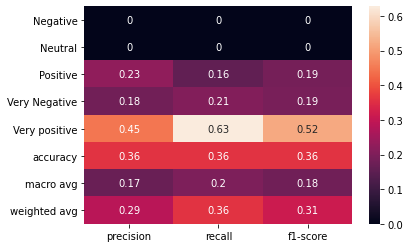

In [ ]:
 
vizer(classification_report(y_test,y_opLSVC,output_dict=True))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [ ]:
mnbModel = mnb.fit(x_train,y_train)

In [ ]:
y_op_multinomialNB = multinomialNB_model.predict(x_test)

In [ ]:
search(y_op_multinomialNB,y_test)

Accuracy Score =  47.0 %
The Classification report
               precision    recall  f1-score   support

     Negative       0.00      0.00      0.00        12
      Neutral       0.00      0.00      0.00        21
     Positive       0.00      0.00      0.00        44
Very Negative       0.00      0.00      0.00        29
Very positive       0.47      1.00      0.64        94

     accuracy                           0.47       200
    macro avg       0.09      0.20      0.13       200
 weighted avg       0.22      0.47      0.30       200



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cvsc(mnbModel,x_test,y_test)

Cross Validation Score 47.0 % 


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


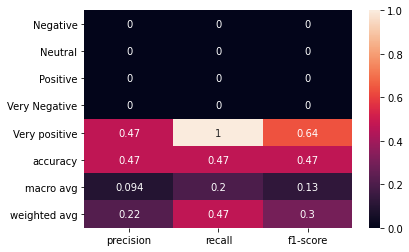

In [ ]:
#visualize the metrics 
vizer(classification_report(y_test,y_op_multinomialNB,output_dict=True))

#**Question 3: House price prediction**


(40 points). You are required to build a regression model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from Dropbox: https://www.dropbox.com/s/52j9hpxppfo921o/assignment4-question3-data.zip?dl=0. Here is an axample for the implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.